In [1]:
!pip install -q transformers xformers git+https://github.com/huggingface/accelerate.git
!pip install -q git+https://github.com/mikegarts/diffusers.git@img2img.multiple.controlnets.pipeline

!pip install opencv-contrib-python
!pip install controlnet_aux

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.8/211.8 MB 5.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.4/202.4 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 87.7 MB/s eta 0:00:00
  Created wheel for controlnet_aux: filename=controlnet_aux-0.0.7-py3-none-any.whl size=274341 sha256=aa1747b5321c88bbeb4e9d91a598420f4f1bba46be85c66f594005907f793a92
  Stored in directory: /root/.cache/pip/wheels/1e/3e/93/6678b4c0bc2ec31d53409b25d4189cbb08bae843e8b2b78e52
Successfully built controlnet_aux


In [2]:

!mkdir -p my_pipe && cd my_pipe && wget -O pipeline.py https://raw.githubusercontent.com/huggingface/diffusers/62e7091e0f2a1bc1f767636f1a05253784860d36/examples/community/stable_diffusion_controlnet_img2img.py

--2023-11-25 19:39:53--  https://raw.githubusercontent.com/huggingface/diffusers/62e7091e0f2a1bc1f767636f1a05253784860d36/examples/community/stable_diffusion_controlnet_img2img.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47377 (46K) [text/plain]
Saving to: ‘pipeline.py’

pipeline.py         100%[===================>]  46.27K  --.-KB/s    in 0.001s  

2023-11-25 19:39:53 (38.4 MB/s) - ‘pipeline.py’ saved [47377/47377]



In [3]:
!pip install ninja

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 6.0 MB/s eta 0:00:00


In [4]:
!pip3 install -U xformers --index-url https://download.pytorch.org/whl/cu118


Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
  Attempting uninstall: xformers
    Found existing installation: xformers 0.0.22.post7
    Uninstalling xformers-0.0.22.post7:
      Successfully uninstalled xformers-0.0.22.post7


In [5]:
import numpy as np
import torch
from PIL import Image
from diffusers import ControlNetModel, UniPCMultistepScheduler
from diffusers import DiffusionPipeline
from diffusers.utils import load_image

In [6]:
controlnet = ControlNetModel.from_pretrained('lllyasviel/control_v11f1e_sd15_tile',
                                             torch_dtype=torch.float16)
pipe = DiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5",
                                         controlnet=[controlnet],
                                         custom_pipeline="./my_pipe",
                                         torch_dtype=torch.float16).to('cuda')
pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe.enable_xformers_memory_efficient_attention()
pipe.enable_model_cpu_offload()

config.json:   0%|          | 0.00/955 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/1.45G [00:00<?, ?B/s]

The config attributes {'global_pool_conditions': False} were passed to ControlNetModel, but are not expected and will be ignored. Please verify your config.json configuration file.


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [7]:
img = load_image("/content/000179_0.jpg")

In [8]:
from PIL import Image
def resize_for_condition_image(input_image: Image, resolution: int):
    input_image = input_image.convert("RGB")
    W, H = input_image.size
    k = float(resolution) / min(H, W)
    H *= k
    W *= k
    H = int(round(H / 64.0)) * 64
    W = int(round(W / 64.0)) * 64
    img = input_image.resize((W, H), resample=Image.LANCZOS)
    return img


In [9]:
condition_image = resize_for_condition_image(img, 1024)
image = pipe(prompt="best quality, clothes, garment, model, shop, shirt",
             negative_prompt="blur, lowres, bad anatomy, bad clothes, bad hands, cropped, worst quality, fading, glitch, robot, tech, high saturation, medieval",
             image=condition_image,
             controlnet_conditioning_image=[condition_image],
             width=condition_image.size[0],
             height=condition_image.size[1],
             strength=1.0,
             generator=torch.manual_seed(0),
             num_inference_steps=14,
            ).images[0]

  0%|          | 0/14 [00:00<?, ?it/s]

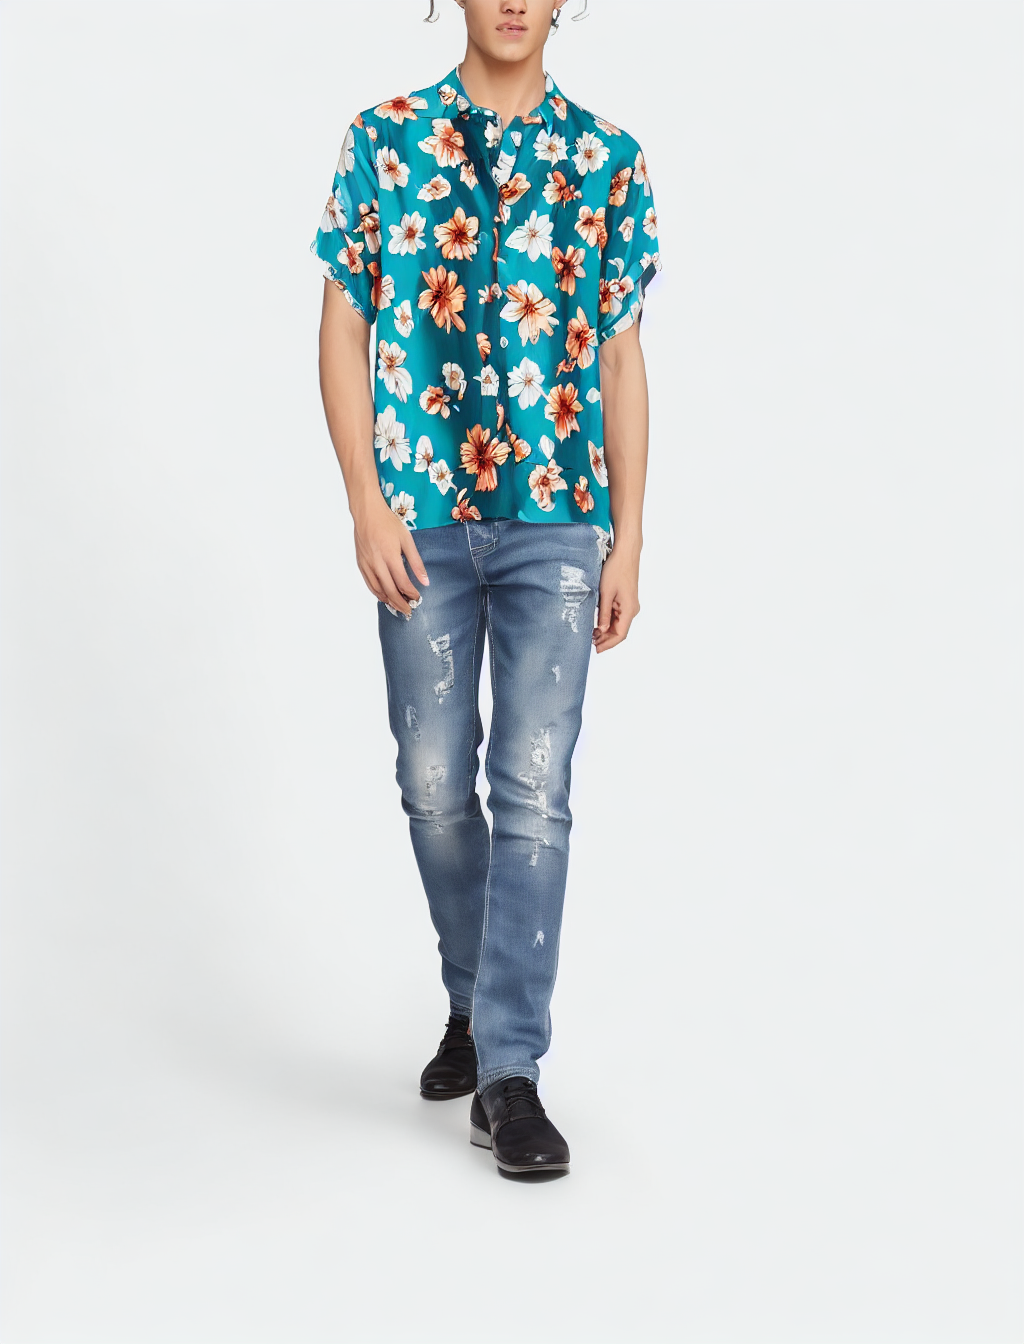

In [10]:
image